In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
train = pd.read_csv('train_csv.csv')
test = pd.read_csv('test_csv.csv')

In [6]:
train.head()
test.head()

,id,time
0,80,2019-03-19 00:13:20
1,81,2019-03-19 00:13:30
2,82,2019-03-19 00:13:40
3,83,2019-03-19 00:13:50
4,84,2019-03-19 00:14:00


In [7]:
train['time'] = pd.to_datetime(train['time'],format ='%Y-%m-%d %H:%M:%S')
test['time'] = pd.to_datetime(test['time'],format ='%Y-%m-%d %H:%M:%S')

In [8]:
train['min'] = train['time'].dt.minute
train['sec'] = train['time'].dt.second
test['min'] = test['time'].dt.minute
test['sec'] = test['time'].dt.second

In [9]:
train.head()

,id,time,feature,min,sec
0,0,2019-03-19 00:00:00,237.97,0,0
1,1,2019-03-19 00:00:10,57.93,0,10
2,2,2019-03-19 00:00:20,90.53,0,20
3,3,2019-03-19 00:00:30,260.75,0,30
4,4,2019-03-19 00:00:40,49.70,0,40


In [10]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
train_X = train[['min','sec']].copy()
test_X = test[['min','sec']].copy()
train_y = train['feature']

In [13]:
ss = StandardScaler()
train_X_scaled = pd.DataFrame(ss.fit_transform(train_X), columns= train_X.columns)
test_X_scaled = pd.DataFrame(ss.transform(test_X), columns= test_X.columns)

lr = LinearRegression()
lr.fit(train_X_scaled,train_y)
test_y_lr = lr.predict(test_X_scaled)
train_y_hat_lr = lr.predict(train_X_scaled)

xgb = XGBRegressor()
xgb.fit(train_X_scaled,train_y)
test_y_xgb = xgb.predict(test_X_scaled)
train_y_hat_xgb = xgb.predict(train_X_scaled)

train_y_hat = (train_y_hat_lr + train_y_hat_xgb)/2
train['feature_hat'] = train_y_hat

test_y = (test_y_lr + test_y_xgb)/2
submit = test.copy()
submit['feature'] = test_y

submit.to_csv('submit.csv',index = False)
submit.head()

,id,time,min,sec,feature
0,80,2019-03-19 00:13:20,13,20,210.609800
1,81,2019-03-19 00:13:30,13,30,245.303018
2,82,2019-03-19 00:13:40,13,40,215.914502
3,83,2019-03-19 00:13:50,13,50,166.004761
4,84,2019-03-19 00:14:00,14,0,138.560522


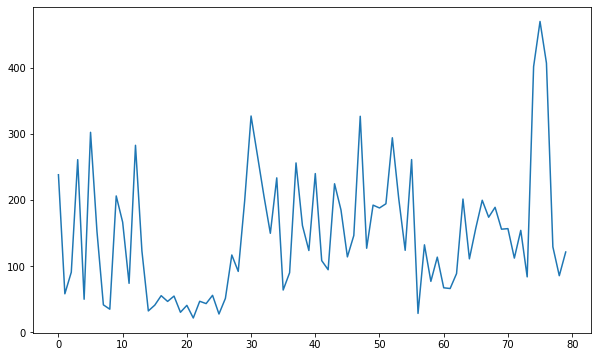

In [16]:
plt.figure(figsize = (10,6))
plt.plot(train['feature'])

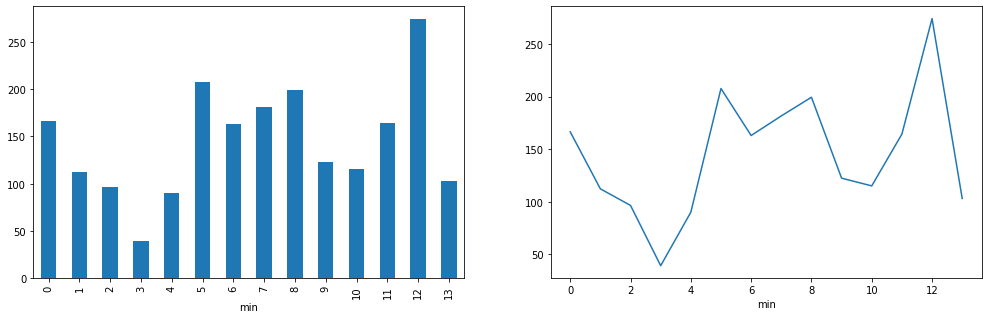

In [20]:
plt.figure(figsize = (17,5))
plt.subplot(1,2,1)
train.groupby('min')['feature'].mean().plot.bar()
plt.subplot(1,2,2)
train.groupby('min')['feature'].mean().plot()

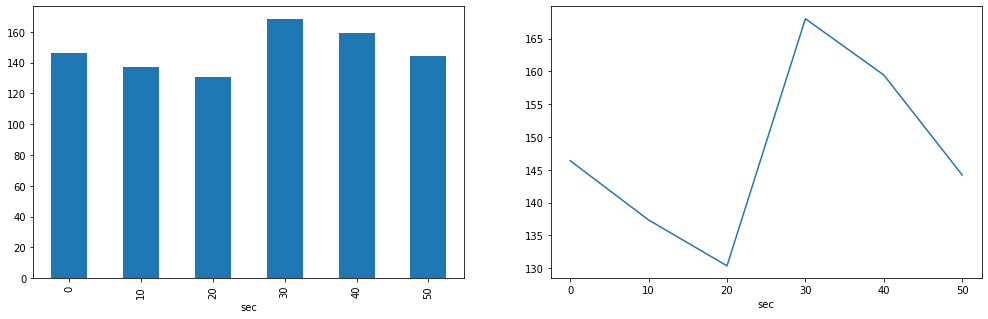

In [19]:
plt.figure(figsize = (17,5))
plt.subplot(1,2,1)
train.groupby('sec')['feature'].mean().plot.bar()
plt.subplot(1,2,2)
train.groupby('sec')['feature'].mean().plot()

In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print('RMSE (train):',sqrt(mean_squared_error(train_y,train_y_hat)))

RMSE (train): 46.31248816064127


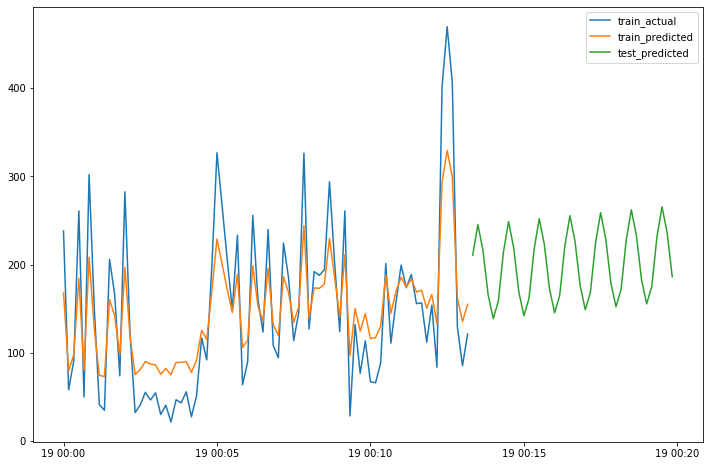

In [15]:
plt.figure(figsize=(12,8))
plt.plot(train.set_index('time').feature, label='train_actual')
plt.plot(train.set_index('time').feature_hat, label='train_predicted')
# plt.plot(test.time, test_y_lr)
# plt.plot(test.time, test_y_xgb)
plt.plot(submit.set_index('time').feature, label="test_predicted")
plt.legend()